In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Import Data

In [2]:
import json

with open("aquinas_new.json", "r") as handle:
    data = json.load(handle)
data[0]

{'volume': 'Volume 1',
 'volumeKey': 'v1',
 'questionTitle': 'Question 1. The nature and extent of sacred doctrine',
 'question': 'Question 1.',
 'questionKey': 'q1',
 'articleTitle': 'Article 1. Whether, besides philosophy, any further doctrine is required?',
 'article': 'Article 1.',
 'articleKey': 'a1',
 'articleObjections': ['Objection 1. It seems that, besides philosophical science, we have no need of any further knowledge. For man should not seek to know what is above reason: "Seek not the things that are too high for thee" (Sirach 3:22). But whatever is not above reason is fully treated of in philosophical science. Therefore any other knowledge besides philosophical science is superfluous.',
  'Objection 2. Further, knowledge can be concerned only with being, for nothing can be known, save what is true; and all that is, is true. But everything that is, is treated of in philosophical science—even God Himself; so that there is a part of philosophy called theology, or the divine sc

# Build a `Reader` containing all of Aristotle's quotes throughout the summa, by book

In [3]:
#import nltk
#sent_text = nltk.sent_tokenize(text)

from tqdm import tqdm
search_texts = ["The Philosopher", "Aristotle"]

aristotle_repository = []
for article in tqdm(data):
    
    # Collection of aristotle objections
    objections = article["articleObjections"]
    for obj in objections:
        if search_texts[0] in obj or search_texts[1] in obj:
            aristotle_repository.append({'volume':article["volume"],
                                         'questionTitle':article["questionTitle"],
                                         'question':article["question"],
                                         'questionKey':article["questionKey"],
                                         'articleTitle':article["articleTitle"],
                                         'articleKey':article["articleKey"],
                                         'content':obj})
    # Collection of aristotle body responses
    body = article["articleBody"]
    for resp in body:
        if search_texts[0] in resp or search_texts[1] in resp:
            aristotle_repository.append({'volume':article["volume"],
                                         'questionTitle':article["questionTitle"],
                                         'question':article["question"],
                                         'questionKey':article["questionKey"],
                                         'articleTitle':article["articleTitle"],
                                         'articleKey':article["articleKey"],
                                         'content':resp})
    # Collection of aristotle reply to objection responses
    reply_to_objections = article["articleReplyToObjections"]
    for resp in body:
        if search_texts[0] in resp or search_texts[1] in resp:
            aristotle_repository.append({'volume':article["volume"],
                                         'questionTitle':article["questionTitle"],
                                         'question':article["question"],
                                         'questionKey':article["questionKey"],
                                         'articleTitle':article["articleTitle"],
                                         'articleKey':article["articleKey"],
                                         'content':resp})
aristotle_repository  

100%|███████████████████████████████████████████████████████████████████████████| 3148/3148 [00:00<00:00, 78246.28it/s]


[{'volume': 'Volume 1',
  'questionTitle': 'Question 1. The nature and extent of sacred doctrine',
  'question': 'Question 1.',
  'questionKey': 'q1',
  'articleTitle': 'Article 1. Whether, besides philosophy, any further doctrine is required?',
  'articleKey': 'a1',
  'content': 'Objection 2. Further, knowledge can be concerned only with being, for nothing can be known, save what is true; and all that is, is true. But everything that is, is treated of in philosophical science—even God Himself; so that there is a part of philosophy called theology, or the divine science, as Aristotle has proved (Metaph. vi). Therefore, besides philosophical science, there is no need of any further knowledge.'},
 {'volume': 'Volume 1',
  'questionTitle': 'Question 3. The simplicity of God',
  'question': 'Question 3.',
  'questionKey': 'q3',
  'articleTitle': 'Article 6. Whether in God there are any accidents?',
  'articleKey': 'a6',
  'content': 'Objection 1. It seems that there are accidents in God. F

# It looks like 19% of the summa leverages Aristotle or The Philosopher

In [4]:
len(aristotle_repository),len(data), str(round(len(aristotle_repository)/len(data) * 100)) + "%"

(594, 3148, '19%')

# Search the 594 for references to each book

Remove some of the duplicate terminology he uses for a few books

In [5]:
import re
from collections import Counter, defaultdict

# Manually collected, verified by exlcuding all else. No good pattern found.
works_cited = set(["Metaph", 
                   "Phys",
                   "De Causis",
                   "Peri Herm",
                   "De Anima",
                   "De Coelo",
                   "Topic", 
                   "De Gener", 
                   "Poster", 
                   "Ethic",
                   "De Caelo",
                   "De Coel",
                   "De Gener. Animal.", 
                   "Rhet",
                   "Polit", 
                   "Rhetor",
                   "Categor",
                   "De Categor",
                   "De Memor. et Remin.",
                   "De Partib. Animal.",
                  "Prior. Anal."])

works_cited_counts = defaultdict(int)
articles_by_reference = defaultdict(list)
verify = False

for record in aristotle_repository:
    for hit in re.findall('\(.*?\)', record["content"]):
        #print(hit)
        
        for item in works_cited:
            if item == "Rhet" or item == "Rhetor":
                key = "Rhet"
            elif item == "Categor" or item == "De Categor":
                key = "Categor"
            elif item == "De Coelo" or item == "De Caelo" or item == "De Coel":
                key = "De Caelo"
            else:
                key = item
            
            if item in hit:
                works_cited_counts[key] += 1
                articles_by_reference[key].append({})
        
        if verify:
            if not any([i in hit for i in works_cited]):
                print(hit)
            
works_cited, works_cited_counts

({'Categor',
  'De Anima',
  'De Caelo',
  'De Categor',
  'De Causis',
  'De Coel',
  'De Coelo',
  'De Gener',
  'De Gener. Animal.',
  'De Memor. et Remin.',
  'De Partib. Animal.',
  'Ethic',
  'Metaph',
  'Peri Herm',
  'Phys',
  'Polit',
  'Poster',
  'Prior. Anal.',
  'Rhet',
  'Rhetor',
  'Topic'},
 defaultdict(int,
             {'Metaph': 30,
              'Phys': 24,
              'De Causis': 5,
              'Peri Herm': 2,
              'De Anima': 100,
              'De Caelo': 18,
              'Topic': 6,
              'De Gener': 8,
              'Poster': 3,
              'Ethic': 306,
              'De Gener. Animal.': 2,
              'Rhet': 31,
              'Polit': 10,
              'Categor': 18,
              'De Memor. et Remin.': 2,
              'De Partib. Animal.': 1}))

# Update works cited and build a small `Reader` for each text referenced

In [69]:
articles_by_reference = defaultdict(list)

aristotle_repository = []
for article in tqdm(data):
    
    ### PRODUCE A SMALL SYTHESIS HERE, KEYWORDS, ETC
    
    # Collection of aristotle objections
    objections = article["articleObjections"]
    for obj in objections:
        for citable in works_cited:
            
            
            if citable in obj:
        
                if citable == "Rhet" or citable == "Rhetor":
                    key = "Rhet"
                elif citable == "Categor" or citable == "De Categor":
                    key = "Categor"
                elif citable == "De Coelo" or citable == "De Caelo" or citable == "De Coel":
                    key = "De Caelo"
                else:
                    key=citable
                articles_by_reference[key].append({'volume':article["volume"],
                                                         'questionTitle':article["questionTitle"],
                                                         'question':article["question"],
                                                         'questionKey':article["questionKey"],
                                                         'articleTitle':article["articleTitle"],
                                                         'articleKey':article["articleKey"],
                                                         'content':obj,
                                                          "type":"objection"})
    # Collection of aristotle body responses
    body = article["articleBody"]
    for resp in body:
        for citable in works_cited:
            if citable in resp:
                if citable == "Rhet" or citable == "Rhetor":
                    key = "Rhet"
                elif citable == "Categor" or citable == "De Categor":
                    key = "Categor"
                elif citable == "De Coelo" or citable == "De Caelo" or citable == "De Coel":
                    key = "De Caelo"
                else:
                    key=citable
                articles_by_reference[key].append({'volume':article["volume"],
                                                         'questionTitle':article["questionTitle"],
                                                         'question':article["question"],
                                                         'questionKey':article["questionKey"],
                                                         'articleTitle':article["articleTitle"],
                                                         'articleKey':article["articleKey"],
                                                         'content':resp,
                                                          "type":"body"})
    
    # Collection of aristotle reply to objection responses
    reply_to_objections = article["articleReplyToObjections"]
    for repl in reply_to_objections:
        for citable in works_cited:
            if citable in repl:
                if citable == "Rhet" or citable == "Rhetor":
                    key = "Rhet"
                elif citable == "Categor" or citable == "De Categor":
                    key = "Categor"
                elif citable == "De Coelo" or citable == "De Caelo" or citable == "De Coel":
                    key = "De Caelo"
                else:
                    key=citable
                articles_by_reference[key].append({'volume':article["volume"],
                                                         'questionTitle':article["questionTitle"],
                                                         'question':article["question"],
                                                         'questionKey':article["questionKey"],
                                                         'articleTitle':article["articleTitle"],
                                                         'articleKey':article["articleKey"],
                                                         'content':repl,
                                                          "type":"reply"})
articles_by_reference  

100%|███████████████████████████████████████████████████████████████████████████| 3148/3148 [00:00<00:00, 11211.96it/s]


defaultdict(list,
            {'Metaph': [{'volume': 'Volume 1',
               'questionTitle': 'Question 1. The nature and extent of sacred doctrine',
               'question': 'Question 1.',
               'questionKey': 'q1',
               'articleTitle': 'Article 1. Whether, besides philosophy, any further doctrine is required?',
               'articleKey': 'a1',
               'content': 'Objection 2. Further, knowledge can be concerned only with being, for nothing can be known, save what is true; and all that is, is true. But everything that is, is treated of in philosophical science—even God Himself; so that there is a part of philosophy called theology, or the divine science, as Aristotle has proved (Metaph. vi). Therefore, besides philosophical science, there is no need of any further knowledge.',
               'type': 'objection'},
              {'volume': 'Volume 1',
               'questionTitle': 'Question 1. The nature and extent of sacred doctrine',
               '

In [70]:
articles_by_reference.keys()

dict_keys(['Metaph', 'Poster', 'Ethic', 'Phys', 'De Causis', 'De Caelo', 'Categor', 'De Anima', 'Topic', 'Peri Herm', 'De Gener', 'De Gener. Animal.', 'De Memor. et Remin.', 'Rhet', 'Polit', 'De Partib. Animal.', 'Prior. Anal.'])

In [71]:
l=articles_by_reference["De Caelo"]

def remove_duplicate_dicts_from_list(l):
    return [dict(t) for t in {tuple(d.items()) for d in l}]
len(remove_duplicate_dicts_from_list(l)), len(l)


(75, 128)

# Remove duplicates

In [72]:
print("Book Name            |  Previous Count  | New Count ")
print("----------------------------------------------------")
for book in articles_by_reference:
    x=len(articles_by_reference[book])
    articles_by_reference[book] = remove_duplicate_dicts_from_list(articles_by_reference[book] )
    y=len(articles_by_reference[book])
    print('{book:<20} | {x:<5}            | {y:<5}'.format(book=book, x=x, y=y))

Book Name            |  Previous Count  | New Count 
----------------------------------------------------
Metaph               | 346              | 346  
Poster               | 32               | 32   
Ethic                | 1398             | 1398 
Phys                 | 325              | 325  
De Causis            | 32               | 32   
De Caelo             | 128              | 75   
Categor              | 27               | 26   
De Anima             | 365              | 365  
Topic                | 51               | 51   
Peri Herm            | 20               | 20   
De Gener             | 63               | 63   
De Gener. Animal.    | 20               | 20   
De Memor. et Remin.  | 9                | 9    
Rhet                 | 241              | 226  
Polit                | 100              | 100  
De Partib. Animal.   | 1                | 1    
Prior. Anal.         | 3                | 3    


# Reorder by volume and question

In [73]:
for book in articles_by_reference:
    articles_by_reference[book] = sorted(articles_by_reference[book], 
                                   key = lambda x:int(x["volume"].split(" ")[-1]) + 
                                                  int(x["questionKey"].split("q")[-1]) +
                                                  int(x["articleKey"].split("a")[-1]), 
                                   reverse=False) 
articles_by_reference["Metaph"]

[{'volume': 'Volume 1',
  'questionTitle': 'Question 1. The nature and extent of sacred doctrine',
  'question': 'Question 1.',
  'questionKey': 'q1',
  'articleTitle': 'Article 1. Whether, besides philosophy, any further doctrine is required?',
  'articleKey': 'a1',
  'content': 'Objection 2. Further, knowledge can be concerned only with being, for nothing can be known, save what is true; and all that is, is true. But everything that is, is treated of in philosophical science—even God Himself; so that there is a part of philosophy called theology, or the divine science, as Aristotle has proved (Metaph. vi). Therefore, besides philosophical science, there is no need of any further knowledge.',
  'type': 'objection'},
 {'volume': 'Volume 1',
  'questionTitle': 'Question 2. The existence of God',
  'question': 'Question 2.',
  'questionKey': 'q2',
  'articleTitle': 'Article 1. Whether the existence of God is self-evident?',
  'articleKey': 'a1',
  'content': 'On the contrary, No one can 

# Another Histogram with all references

[('Ethic', 1398), ('De Anima', 365), ('Metaph', 346), ('Phys', 325), ('Rhet', 226), ('Polit', 100), ('De Caelo', 75), ('De Gener', 63), ('Topic', 51), ('Poster', 32), ('De Causis', 32), ('Categor', 26), ('Peri Herm', 20), ('De Gener. Animal.', 20), ('De Memor. et Remin.', 9), ('Prior. Anal.', 3), ('De Partib. Animal.', 1)]


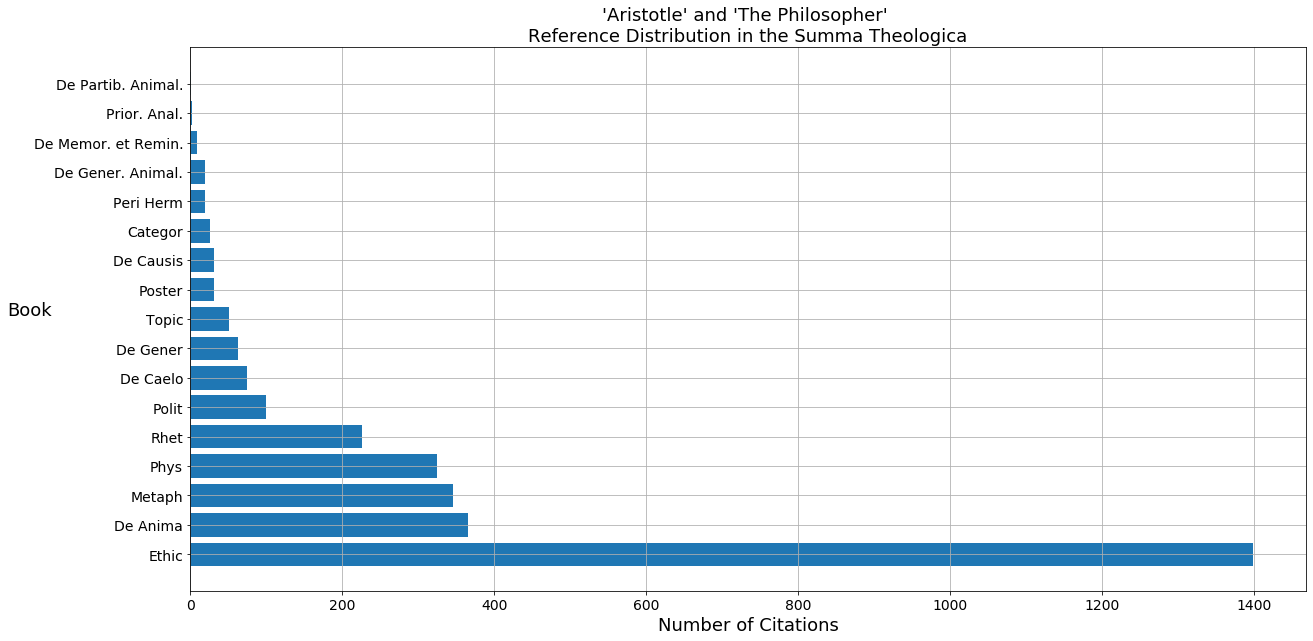

In [63]:
import matplotlib.pyplot as plt

x = {k:len(v) for k,v in articles_by_reference.items()}
x = sorted(x.items(), key = lambda x:x[1], reverse=True)
print(x)
plt.figure(figsize=(20,10))
plt.barh(list(map(lambda y:y[0], x)), list(map(lambda y:y[1], x)))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title("'Aristotle' and 'The Philosopher' \nReference Distribution in the Summa Theologica", fontsize=18)
plt.xlabel("Number of Citations", fontsize=18)
plt.ylabel("Book", fontsize=18, rotation=360)
plt.savefig("distribution.png")


In [64]:
articles_by_reference["Rhet"]

[{'volume': 'Volume 2',
  'questionTitle': 'Question 7. The circumstances of human acts',
  'question': 'Question 7.',
  'questionKey': 'q7',
  'articleTitle': 'Article 1. Whether a circumstance is an accident of a human act?',
  'articleKey': 'a1',
  'content': 'Objection 1. It would seem that a circumstance is not an accident of a human act. For Tully says (De Invent. Rhetor. i) that a circumstance is that from "which an orator adds authority and strength to his argument." But oratorical arguments are derived principally from things pertaining to the essence of a thing, such as the definition, the genus, the species, and the like, from which also Tully declares that an orator should draw his arguments. Therefore a circumstance is not an accident of a human act.',
  'type': 'objection'},
 {'volume': 'Volume 3',
  'questionTitle': 'Question 1. Faith',
  'question': 'Question 1.',
  'questionKey': 'q1',
  'articleTitle': 'Article 6. Whether those things that are of faith should be divid

# Clean it up so every Volume/Question is unique and has a list of content items

In [48]:
"""
new_articles_by_reference = defaultdict(dict)
for k,v in articles_by_reference.items():
    book = k
    records = v
    for r in records:
        # For caching
        tmpKey = "{}-{}".format(r["volume"], r["questionKey"])
        
        try:
            new_articles_by_reference[book][tmpKey].append(r)
        except:
            new_articles_by_reference[book][tmpKey] = []
            new_articles_by_reference[book][tmpKey].append(r)
            
"""  
# De-duplicate the dictionary if the same article pops up?

'\nnew_articles_by_reference = defaultdict(dict)\nfor k,v in articles_by_reference.items():\n    book = k\n    records = v\n    for r in records:\n        # For caching\n        tmpKey = "{}-{}".format(r["volume"], r["questionKey"])\n        \n        try:\n            new_articles_by_reference[book][tmpKey].append(r)\n        except:\n            new_articles_by_reference[book][tmpKey] = []\n            new_articles_by_reference[book][tmpKey].append(r)\n            \n'

In [49]:
#new_articles_by_reference["Metaph"]["Volume 1-q1"]


# Write everything in one big document

In [74]:
from docx import Document
from docx.shared import Inches
from docx.enum.text import WD_COLOR_INDEX

from gensim.summarization import keywords
from gensim.summarization.summarizer import summarize


summarize_me = False
keywords_me = True

document = Document()

document.add_heading('Aquinas Reader On Aristotle or The Philosopher', 0)
document.add_paragraph("St. Thomas Aquinas is often referred to as one of the greatest commentators of Aristotle. The aim of this work is to make St. Thomas the philosopher more accessible for a concentrated study. In order to accomplish this, his principle work, the Summa Theologica has been currated to only sections including the mention of 'Aristotle' or 'The Philosopher'. This subset of articles has been further divided by book from the Aristotelian corpus. Keywords have been added to enrich the learning experience with overarching snapshots. The sections presented are as they appear in the Summa Theologica for each reference book identified by headers. Each reference book in study is highlighted throughout in yellow for convenience. Books identified with multiple matching references have been adjudicated arbitrarily.")
document.add_paragraph("We hope you enjoy this study of Aristotle as he is depicted through the lens of St. Thomas.")

# Add some useful keywords
allText = "\n".join([r["content"] for book in articles_by_reference for r in articles_by_reference[book]])
if keywords_me:
    kwds = keywords(allText, lemmatize=True)
    ls_kwds = [i for i in kwds.split("\n") if not i in ["objection", "objections", "reply", "replies"]][:50]
    kwds_text = ", ".join(ls_kwds) + "."

    p = document.add_paragraph()
    run = p.add_run("Keywords: ").font
    run.bold = True
    p = document.add_paragraph(kwds_text)

# Add a useful summary
if summarize_me:
    summary = summarize(allText, ratio=0.2).split("\n")[:50]
    summary_text = " ".join(summary) + "."

    p = document.add_paragraph()
    run = p.add_run("Summary: ").font
    run.bold = True
    p = document.add_paragraph(summary_text)

#p = document.add_paragraph()
#r = p.add_run()
#r.add_picture('distribution.png', width=Inches(6.8), height=Inches(4.9))

# Loop through all books
for k,v in articles_by_reference.items():
    book = k
    records = v
    spokenForQuestions = set()
    spokenForArticles = set()
    document.add_heading('{}'.format(book), level=1)
    
    # Add some useful keywords
    allText = "\n".join([r["content"] for r in articles_by_reference[book]])
    if keywords_me:
        kwds = keywords(allText, lemmatize=True)
        ls_kwds = [i for i in kwds.split("\n") if not i in  ["objection", "objections", "reply", "replies"]][:50]
        kwds_text = ", ".join(ls_kwds) + "."

        p = document.add_paragraph()
        run = p.add_run("Keywords: ").font
        run.bold = True
        p = document.add_paragraph(kwds_text)
    
    # Add a useful summary
    if summarize_me:
        summary = summarize(allText).split("\n")[:50]
        summary_text = " ".join(summary) + "."

        p = document.add_paragraph()
        run = p.add_run("Summary: ").font
        run.bold = True
        p = document.add_paragraph(summary_text)
    
    # Add the content
    for r in records:
        # For caching
        tmpKey1 = "{}-{}".format(r["volume"], r["questionKey"])
        if not tmpKey1 in spokenForQuestions:
            document.add_heading('{} - {}'.format(r["volume"], r["questionTitle"]), level=2)
            spokenForQuestions.add(tmpKey1)
        
        tmpKey2 = tmpKey1 + "-{}".format(r["articleKey"])
        if not tmpKey2 in spokenForArticles:
            p = document.add_paragraph()
            run = p.add_run(r["articleTitle"]).font
            run.bold = True
            spokenForArticles.add(tmpKey2)
            
        x = r["content"].split(book)
        p = document.add_paragraph("", style='Quote')
        for i,y in enumerate(x):
                p.add_run(y)
                
                if i != len(x)-1:
                    font = p.add_run(book).font
                    font.highlight_color = WD_COLOR_INDEX.YELLOW
        #p.add_run("\"")
                
            
        #document.add_paragraph("") #line break

    document.add_page_break()

document.save('Aristotle/AquinasReaderOnAristotle.docx')

# Create one document for each book

In [75]:
from docx import Document
from docx.shared import Inches
from docx.enum.text import WD_COLOR_INDEX

from gensim.summarization import keywords
from gensim.summarization.summarizer import summarize

books = list(articles_by_reference.keys())

# Loop through all books
for book in books:
    document = Document()

    document.add_heading('Aquinas Reader On Aristotle or The Philosopher', 0)
    document.add_paragraph("St. Thomas Aquinas is often referred to as one of the greatest commentators of Aristotle. The aim of this work is to make St. Thomas the philosopher more accessible for a concentrated study. In order to accomplish this, his principle work, the Summa Theologica has been currated to only sections including the mention of 'Aristotle' or 'The Philosopher'. This subset of articles has been further divided by book from the Aristotelian corpus. Keywords and a simple summary have been added to enrich the learning experience with overarching snapshots. We have added a reference distribution to illustrate the prominence of his citations. The sections presented are as they appear in the Summa Theologica for each reference book identified by headers. Each reference book in study is highlighted throughout in yellow for convenience. Books identified with multiple matching references have been adjudicated arbitrarily.")

    p = document.add_paragraph("This is a smaller reader of Aquinas in so far as Aristotle is referenced in ")
    font = p.add_run("{}.".format(book)).font
    font.bold = True

    document.add_paragraph("We hope you enjoy this study of Aristotle as he is depicted through the lens of St. Thomas.")
    
    spokenForQuestions = set()
    spokenForArticles = set()
    document.add_heading('{}'.format(book), level=1)
        
    # Add some useful keywords
    allText = "\n".join([r["content"] for r in articles_by_reference[book]])
    if keywords_me:
        kwds = keywords(allText, lemmatize=True)
        ls_kwds = [i for i in kwds.split("\n") if not i in  ["objection", "objections", "reply", "replies"]][:50]
        kwds_text = ", ".join(ls_kwds) + "."

        p = document.add_paragraph()
        run = p.add_run("Keywords: ").font
        run.bold = True
        p = document.add_paragraph(kwds_text)
    
    # Add a useful summary
    if summarize_me:
        summary = summarize(allText).split("\n")[:50]
        summary_text = " ".join(summary) + "."

        p = document.add_paragraph()
        run = p.add_run("Summary: ").font
        run.bold = True
        p = document.add_paragraph(summary_text)
    
    # Add the content
    for r in articles_by_reference[book]:
        # For caching
        tmpKey1 = "{}-{}".format(r["volume"], r["questionKey"])
        if not tmpKey1 in spokenForQuestions:
            document.add_heading('{} - {}'.format(r["volume"], r["questionTitle"]), level=2)
            spokenForQuestions.add(tmpKey1)

        tmpKey2 = tmpKey1 + "-{}".format(r["articleKey"])
        if not tmpKey2 in spokenForArticles:
            p = document.add_paragraph()
            run = p.add_run(r["articleTitle"]).font
            run.bold = True
            spokenForArticles.add(tmpKey2)

        x = r["content"].split(book)
        p = document.add_paragraph("", style='Quote')
        for i,y in enumerate(x):
                p.add_run(y)

                if i != len(x)-1:
                    font = p.add_run(book).font
                    font.highlight_color = WD_COLOR_INDEX.YELLOW
                    font.bold = True
        #p.add_run("\"")

        #document.add_paragraph("") #line break


        #document.add_page_break()

    document.save('Aristotle/AquinasOn_{}.docx'.format(book))

In [27]:
from gensim.summarization import keywords
from gensim.summarization.summarizer import summarize

# Add some useful keywords
allText = "\n".join([r["content"] for book in articles_by_reference for r in articles_by_reference[book]])
kwds = keywords(allText, lemmatize=True, ratio=0.2).split("\n")[:50]
kwds_text = ", ".join(kwds) + "."
kwds

['objections',
 'wherefore',
 'thing',
 'accords',
 'replies',
 'natur',
 'goods',
 'certain',
 'calling',
 'wise man',
 'sayings',
 'virtus',
 'ethics',
 'acted',
 'consequences',
 'reasonably',
 'gods',
 'causing',
 'secondly',
 'powerful',
 'liking',
 'bodies',
 'differed',
 'perfectible',
 'matters',
 'knowledges',
 'belonged',
 'accordingly',
 'evils',
 'sinning',
 'movements',
 'regarded',
 'sensing',
 'pleasurable',
 'soul',
 'viz',
 'ways',
 'iii',
 'personality',
 'greater',
 'animation',
 'philosophers',
 'formative',
 'men',
 'stating',
 'passionate',
 'contraries',
 'actions',
 'lawful',
 'intellective']